Лабораторная работа №1

In [1]:
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [5]:
x = df.drop(['Quality'], axis=1)
y = df['Quality'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
labelEncoder = preprocessing.LabelEncoder()
Y_train = labelEncoder.fit_transform(Y_train)
Y_test = labelEncoder.fit_transform(Y_test)

In [9]:
train_scores = []
test_scores = []


for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)

    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(cross_val_score(knn, X_test, Y_test).mean())

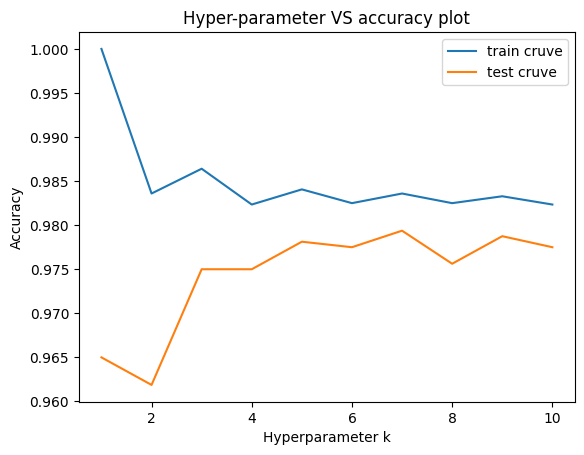

In [10]:
params = [1,2,3,4,5,6,7,8,9,10]
plt.plot(params, train_scores, label='train cruve')
plt.plot(params, test_scores, label='test cruve')
plt.xlabel("Hyperparameter k")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       795
           1       0.99      0.98      0.98       805

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



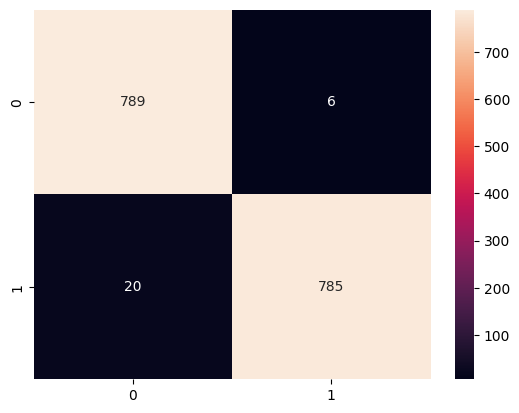

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

Y_predict = classifier.predict(X_test)

cm = pd.DataFrame(confusion_matrix(Y_test, Y_predict))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(Y_test, Y_predict))

Random Forest

In [12]:
train_scores = []
test_scores = []


for depth in range(1, 16):
    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train, Y_train)

    train_scores.append(model.score(X_train, Y_train))
    test_scores.append(cross_val_score(model, X_test, Y_test).mean())

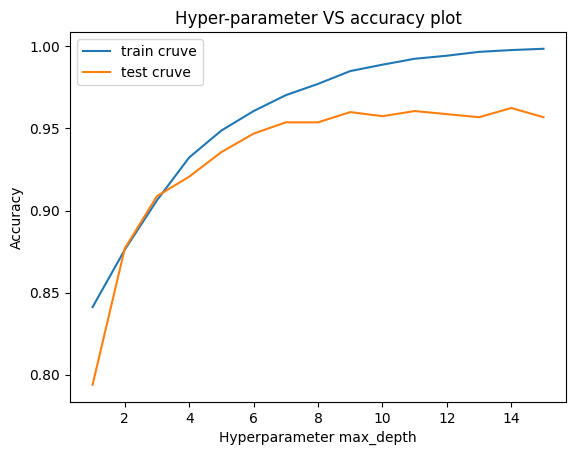

In [13]:
params = range(1, 16)
plt.plot(params, train_scores, label='train cruve')
plt.plot(params, test_scores, label='test cruve')
plt.xlabel("Hyperparameter max_depth")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       795
           1       0.98      0.96      0.97       805

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



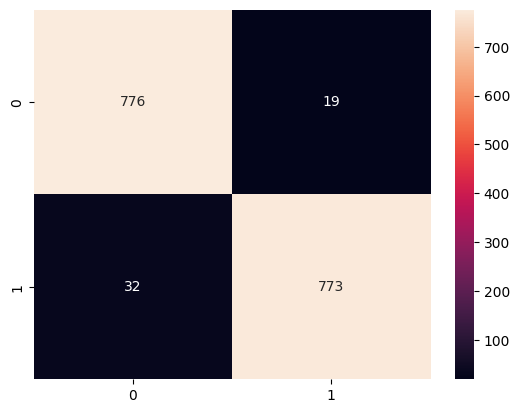

In [14]:
classifier = RandomForestClassifier(max_depth=8)
classifier.fit(X_train, Y_train)

Y_predict = classifier.predict(X_test)

cm = pd.DataFrame(confusion_matrix(Y_test, Y_predict))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(Y_test, Y_predict))